# Project: Medical Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report is based on analysing a dataset which contains more than 110k medical appointments in Brazil and is aimed to determine the important factors of whether or not patients show up for their appointment, which will be significant for future prediction. 


In [1]:
# import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Data inspection
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

This dataset contains information of 110527 appointments and has 14 variables.

In [4]:
# check if there is duplicated data
df.duplicated().sum()

0

In [5]:
# check if there is null value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no duplicated data or null value in this dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning
From above data inspection, the dataset is processed in four aspects : dropping useless variables, adjusting out-of-range data, changing data type and renaming variables.
#### 1. Drop  unnecessary variables
Two variables - PatientId and AppointmentID are dropped.

In [9]:
#drop variable PatientId and AppointmentID
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [10]:
# test
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2. Adjust data that is out of range 

##### (1) Age

In [11]:
# check if there is data out of range
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [12]:
# check the data with age = -1
df[df.Age <0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is one patient whose age is -1. As age cannot be negative, it is removed from the dataset. 

In [13]:
#drop data with age = -1
df.drop(df[df.Age < 0].index, inplace=True)

##### (2) Handicap

In [14]:
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

According to data description document, variable Handicap is defined as 1 - handicapped and 0 - not handicapped. Patients probably described their higher level of handicap by numbers that are higher than 1, these values are thus replaced by 1.

In [15]:
df[df.Handcap >1] = 1

In [16]:
#test
df.Handcap.value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

##### (3) Neighbourhood

In [17]:
# the number of different neighbourhoods
df['Neighbourhood'].nunique()

82

In [18]:
# the names of neighbourhood
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [19]:
# show details of data with Neighbourhood = 1
df[df['Neighbourhood']==1].head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,1,1,1,1,1,1,1,1,1,1,1,1
1665,1,1,1,1,1,1,1,1,1,1,1,1
1666,1,1,1,1,1,1,1,1,1,1,1,1
2071,1,1,1,1,1,1,1,1,1,1,1,1
2091,1,1,1,1,1,1,1,1,1,1,1,1


In [20]:
# number of rows with neighbourhood = 1
df[df['Neighbourhood']==1].shape[0]

199

199 rows are labelled "1" in variable Neighbourhood and then removed from the dataset considering the loss of information.

In [21]:
# drop data with neighbourhood = 1
df.drop(df[df.Neighbourhood == 1].index, inplace=True)

In [22]:
# test
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [23]:
df['Neighbourhood'].nunique()

81

#### 3. Change data type 

##### (1) Date
The data type of two variables - ScheduledDay and AppointmentDay are changed into datetime.

In [24]:
# change scheduled day and appointment day to datetime 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [25]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110327 non-null  object        
 1   ScheduledDay    110327 non-null  datetime64[ns]
 2   AppointmentDay  110327 non-null  datetime64[ns]
 3   Age             110327 non-null  int64         
 4   Neighbourhood   110327 non-null  object        
 5   Scholarship     110327 non-null  int64         
 6   Hipertension    110327 non-null  int64         
 7   Diabetes        110327 non-null  int64         
 8   Alcoholism      110327 non-null  int64         
 9   Handcap         110327 non-null  int64         
 10  SMS_received    110327 non-null  int64         
 11  No-show         110327 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.9+ MB


In [26]:
# check if there's data that has appointment day earlier than scheduled day
df[df.AppointmentDay < df.ScheduledDay]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


5 rows are removed as appointment day cannot be before scheduled day. A new variable WaitingTime is added to descirbe the time difference between appointment day and scheduled day.

In [27]:
# drop data that has appointment day earlier than scheduled day
df.drop(df[df.AppointmentDay < df.ScheduledDay].index, inplace=True)

In [28]:
# create a variable measuring waiting time
df['WaitingTime'] = df['AppointmentDay'] - df['ScheduledDay']

In [29]:
df['WaitingTime'].describe()

count                        110322
mean     10 days 04:30:02.055800293
std      15 days 06:11:27.339088303
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: WaitingTime, dtype: object

##### (2) Gender
Variable Gender is revised to 1 for male and 0 for female.

In [30]:
# replace gender with dummies
df['Gender'].replace(['F','M'],[0,1],inplace=True)

In [31]:
#test
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTime
0,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   Gender          110322 non-null  int64          
 1   ScheduledDay    110322 non-null  datetime64[ns] 
 2   AppointmentDay  110322 non-null  datetime64[ns] 
 3   Age             110322 non-null  int64          
 4   Neighbourhood   110322 non-null  object         
 5   Scholarship     110322 non-null  int64          
 6   Hipertension    110322 non-null  int64          
 7   Diabetes        110322 non-null  int64          
 8   Alcoholism      110322 non-null  int64          
 9   Handcap         110322 non-null  int64          
 10  SMS_received    110322 non-null  int64          
 11  No-show         110322 non-null  object         
 12  WaitingTime     110322 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(8), object(2), timedelta64[ns](1)
memory usage

##### (3) No-show 
Varibale No-show is modified to 'Absent' for 'Yes' and 'Present' for 'No'.

In [33]:
# modify the values of variable No-show 
df['No-show'].replace(['Yes','No'],['Absent','Present'],inplace=True)

In [34]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTime
0,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,0 days
1,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,0 days
2,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Present,0 days
3,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,0 days
4,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,0 days


#### 4. Rename variables
There are some typos in variables names, which are replaced by the right ones. Besides, the variable No-show is renamed to Presence for better understanding.

In [35]:
# rename variables with typos or confusion
df.rename(columns={'No-show':'Presence', 'Handcap': 'Handicap', 'Hipertension': 'Hypertension'}, inplace=True)

In [36]:
df.describe()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingTime
count,110322.000000,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322
mean,0.349840,37.07092,0.098285,0.196842,0.071609,0.030384,0.018491,0.321196,10 days 04:30:02.055800293
std,0.476921,23.09791,0.297701,0.397614,0.257840,0.171642,0.134720,0.466938,15 days 06:11:27.339088303
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,0.000000,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,0.000000,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,1.000000,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,1.000000,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179 days 00:00:00


In [37]:
df.shape

(110322, 13)

Through the above cleaning process, the final dataset includes 110322 medical appointments (205 rows are removded) and 13 variables. 

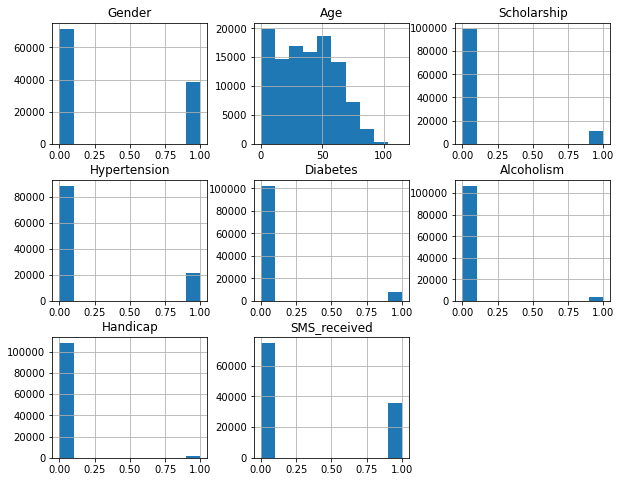

In [38]:
#histograms of variables
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis

In [39]:
# absence rate of data
sum(df.Presence == "Absent")/df.Presence.count()

0.2018908286651801

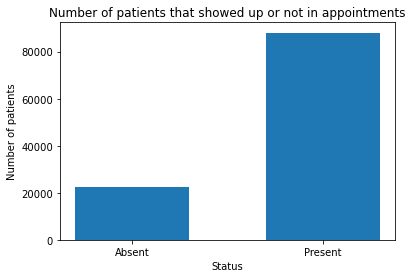

In [40]:
# plot the details of absence rate
plt.bar(["Absent", "Present"], [sum(df.Presence == "Absent"), sum(df.Presence == "Present")], width =0.6)
plt.title("Number of patients that showed up or not in appointments")
plt.xlabel("Status")
plt.ylabel("Number of patients");

In general, 20.19% of people missed their medical appointments. 

In [41]:
# Seperate the dataset into two groups - absent and present
absent = df.Presence == 'Absent'
present = df.Presence == 'Present'

In [42]:
df[absent].mean()

<ipython-input-42-ec1cefebfc34>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[absent].mean()


Gender                            0.346069
Age                                34.2793
Scholarship                       0.115701
Hypertension                      0.168275
Diabetes                         0.0638441
Alcoholism                       0.0303058
Handicap                         0.0163427
SMS_received                      0.438872
WaitingTime     15 days 20:02:04.778880258
dtype: object

In [43]:
df[present].mean()

<ipython-input-43-6a65f4a51e30>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[present].mean()


Gender                           0.350793
Age                               37.7771
Scholarship                     0.0938795
Hypertension                     0.204068
Diabetes                        0.0735727
Alcoholism                      0.0304035
Handicap                        0.0190349
SMS_received                     0.291429
WaitingTime     8 days 18:12:56.431305295
dtype: object

### Question 1: Is there any gender difference in not showing up in appointments?

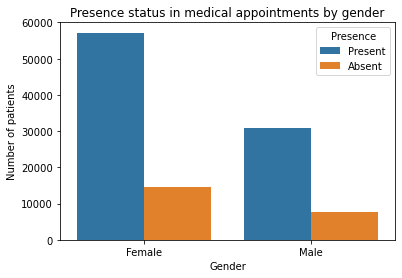

In [44]:
#plot presence status by gender
ax1 = sns.countplot(x=df.Gender, hue=df.Presence, data=df)
ax1.set_title("Presence status in medical appointments by gender")
x_ticks_labels=['Female', 'Male']
ax1.set_xticklabels(x_ticks_labels)
ax1.set(xlabel='Gender', ylabel='Number of patients')
plt.show()

In [45]:
# get counts for each gender and presence
gender_counts = df.groupby(['Gender','Presence']).count()['Age']
gender_counts

Gender  Presence
0       Absent      14565
        Present     57162
1       Absent       7708
        Present     30887
Name: Age, dtype: int64

In [46]:
# get total counts for each gender
gender_totals = df.groupby('Gender').count()['Age']
gender_totals

Gender
0    71727
1    38595
Name: Age, dtype: int64

In [47]:
# get proportions of female
female_proportions = gender_counts[0] / gender_totals[0]
female_proportions

Presence
Absent     0.203062
Present    0.796938
Name: Age, dtype: float64

In [48]:
# get proportions of male
male_proportions = gender_counts[1] / gender_totals[1]
male_proportions

Presence
Absent     0.199715
Present    0.800285
Name: Age, dtype: float64

Among the patients, 71727 are female, nearly twice of the number of male ,which is 38595. The probabilities of not showing up in female and male are almost the same, 20.31% and 19.97% respectively. Thus, gender is not a determining factor of being absent in medical appointments. 

### Question 2: Does age play a role in absence in appointments?

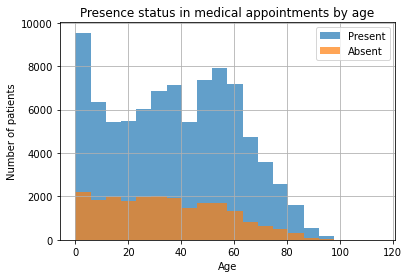

In [49]:
#Plot presence status by age
df.Age[present].hist(alpha=0.7, bins=20, label='Present')
df.Age[absent].hist(alpha=0.7, bins=20, label='Absent')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Presence status in medical appointments by age')
plt.legend();

In [50]:
#baby 0-4 years old
sum(df.Age <5)

10240

In [51]:
# presence status of babies
baby = df[df.Age <5]
baby.groupby('Presence').count()['Age']

Presence
Absent     1865
Present    8375
Name: Age, dtype: int64

In [52]:
# babies absence rate
1865/10240

0.18212890625

In [53]:
#Elder people: >=65
sum(df.Age > 64)

14342

In [54]:
# presence status of elder people
old = df[df.Age >64]
old.groupby('Presence').count()['Age']

Presence
Absent      2214
Present    12128
Name: Age, dtype: int64

In [55]:
#older people absence rate
2214/14342

0.1543717752056896

Babies (0-4 years old) and older people (over 65 years old) are more likely to show up in medical appointments, have absence rate of 18.21% and 15.44%, which are lower than the average absence rate of 20.19%. This might be because both age groups are more sensitive to health problems.

### Question 3: Does waiting time affect not showing up in appointments?

In [56]:
# calculate the means of waiting time for absent and present people 
wait_absent = df.WaitingTime[absent].mean().days
wait_present = df.WaitingTime[present].mean().days

# the percentage
wait_absent, wait_present, (wait_absent- wait_present)/wait_present

(15, 8, 0.875)

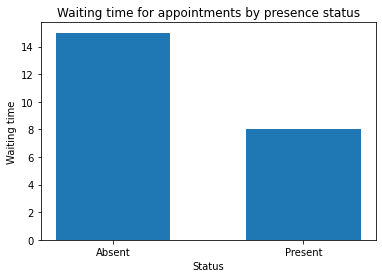

In [57]:
# plot the means of waiting time for absent and present people 
plt.bar(["Absent", "Present"], [wait_absent, wait_present], width =0.6)
plt.title("Waiting time for appointments by presence status")
plt.xlabel("Status")
plt.ylabel("Waiting time");

In [58]:
# seek the median of the data 
waitmedian = df.WaitingTime.median()
waitmedian

Timedelta('4 days 00:00:00')

In [59]:
# seperate the data into two groups according to waiting time 
# higher than median - longwait
longwait = df[df.WaitingTime > df.WaitingTime.median()]
longwait.groupby('Presence').count()['Age']

Presence
Absent     15905
Present    36007
Name: Age, dtype: int64

In [60]:
# not higher than median - shortwait
shortwait = df[df.WaitingTime <= df.WaitingTime.median()]
shortwait.groupby('Presence').count()['Age']

Presence
Absent      6368
Present    52042
Name: Age, dtype: int64

In [61]:
#longwait/shortwait groups' absence rate
15905/(15905+36007),6368/(6368+52042)

(0.3063838804130066, 0.10902242766649546)

In [62]:
df['LongWait'] =  (df.WaitingTime < waitmedian)

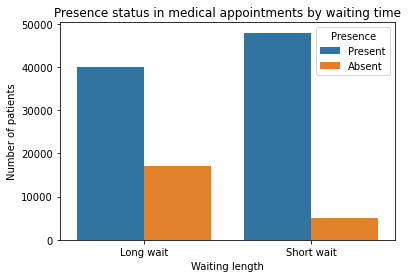

In [63]:
# plot presence status by waiting time
ax1 = sns.countplot(x='LongWait', hue='Presence', data=df)
ax1.set_title("Presence status in medical appointments by waiting time")
x_ticks_labels=['Long wait', 'Short wait']
ax1.set_xticklabels(x_ticks_labels)
ax1.set(xlabel='Waiting length', ylabel='Number of patients')
plt.show();

The absent patients have average 15 days to wait for the appointments, 87.5% longer than that of present patients (8 days). The absence rate increases dramatically from 10.9% to 30.64% when people wait for more than 4 days (the median of waiting time). The longer the waiting time is, the more probably people will not show up in medical appointments.

### Question 4: Does day of week of appointments influence presence?

In [64]:
# create a variable indicating day of week of appointment day
df['AppointmentDay_DOW']=df['AppointmentDay'].dt.day_name()

#order of day of week
weekorder = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [65]:
# appointment day details
df.groupby(['Presence','AppointmentDay_DOW']).size().unstack().reindex(weekorder, axis=1)

AppointmentDay_DOW,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Presence,,,,,,
Absent,4680,5134,5083,3334,4033,9
Present,17997,20448,20740,13882,14952,30


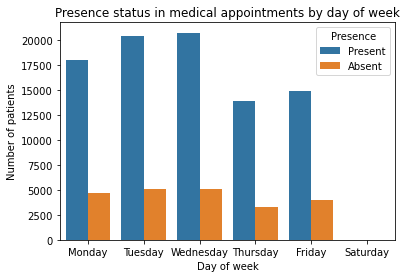

In [66]:
# plot presence status by day of week
#too few apoointments happen in Saturday
ax1 = sns.countplot(x=df.AppointmentDay_DOW, hue=df.Presence, data=df,order=weekorder)
ax1.set_title("Presence status in medical appointments by day of week")
ax1.set(xlabel='Day of week', ylabel='Number of patients')
plt.show()

In [67]:
showrate_DOW = df[df.Presence =='Absent'].groupby('AppointmentDay_DOW').count()['Age']/df.groupby('AppointmentDay_DOW').count()['Age']
showrate_DOW = showrate_DOW.loc[weekorder]
showrate_DOW

AppointmentDay_DOW
Monday       0.206377
Tuesday      0.200688
Wednesday    0.196840
Thursday     0.193657
Friday       0.212431
Saturday     0.230769
Name: Age, dtype: float64

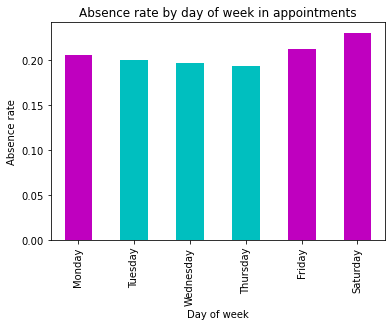

In [68]:
# plot absence rate by day of week
# color by magenta for days with absence rate higher than average
showrate_DOW.plot(kind='bar',color=(showrate_DOW >= 0.2019).map({True: 'm',False: 'c'}))
plt.title("Absence rate by day of week in appointments")
plt.xlabel("Day of week")
plt.ylabel("Absence rate");

On Friday and Saturday, people are slightly more likely to be absent in appointments with absence rates of 21.24% and 23.07% respectively. Though the absence rate on Monday is higher than the average, it's too close to be treated as a difference.
### Question 5: Does neighbourhood influence absence rate?

In [69]:
# make the neighbourhoods readable (change to title case)
df['Neighbourhood'] = df['Neighbourhood'].str.title()

# check absence rate for every neighbourhood
neigh = df[df.Presence =='Absent'].groupby('Neighbourhood').count()['Age']/df.groupby('Neighbourhood').count()['Age']
neigh = neigh.sort_values(ascending=False)
neigh

Neighbourhood
Ilhas Oceânicas De Trindade    1.000000
Santos Dumont                  0.289639
Santa Cecília                  0.274554
Santa Clara                    0.265347
Itararé                        0.262618
                                 ...   
Solon Borges                   0.147122
Mário Cypreste                 0.145553
Aeroporto                      0.125000
Ilha Do Boi                    0.085714
Parque Industrial                   NaN
Name: Age, Length: 81, dtype: float64

In [70]:
# check data in Ilhas Oceânicas De Trindade
df[df['Neighbourhood']=='Ilhas Oceânicas De Trindade']

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Presence,WaitingTime,LongWait,AppointmentDay_DOW
48754,0,2016-04-14,2016-05-13,51,Ilhas Oceânicas De Trindade,0,0,0,0,0,0,Absent,29 days,False,Friday
48765,0,2016-04-14,2016-05-13,58,Ilhas Oceânicas De Trindade,0,0,0,0,0,0,Absent,29 days,False,Friday


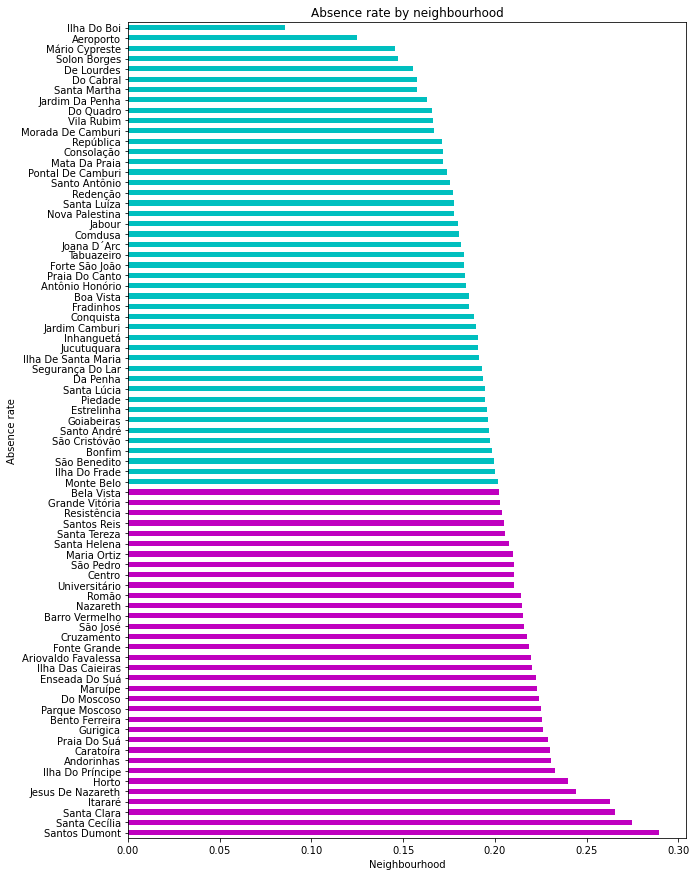

In [71]:
#drop extreme values for better plotting
nei_final = neigh[neigh <1]
# neighbourhoods have absence rate higher than the average (20.19%) are colored by magenta. The rest are colored by cyan. 
nei_final.plot(kind='barh',figsize=(10,15), color=(nei_final >= 0.2019).map({True: 'm',False: 'c'}))
plt.title("Absence rate by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Absence rate");

In [72]:
#number of neighbourhoods that are above the average
nei_final[nei_final >=0.2019].count()

34

Neighbourhood is an important factor of no showing up in appointment. People in 34 areas are more likely to be absent than that of the average. The absence rates in Santos Dumont, Santa Cecília, Santa Clara, Itararé are comparatively high, which are 28.96%, 27.46%, 26.53%, 26.26% respectively. In contrast, people in Ilha Do Boi, Aeroporto, Mário Cypreste, Solon Borges show up more with absence rate of 8.57%, 12.5%, 14.56%, 14.71%.

<a id='conclusions'></a>
## Conclusions

This report analyses the factors relevant to people's showing-up in medical appointments, namely gender, age, waiting time, day of week and neighbourhood. It's found that babies(0-4 years) and the elder (over 65 years) are more likely to present in appintments, while people with longer waiting time present less. Moreover, people are more likely to be absent when the appointments are scheduled to be on Friday and Saturday. Besides, neighbourhood plays an important role in no show-up of medical appointments. There is almost no gender difference in appointment absence. Therefore, age, waiting time, the day of week of appointment and neighbourhood are substantial in predicting show-up in medical appointment.

### Limitations
Firstly, data of appointments on Saturday are limited, which might be less representitive. Furthermore, no statistical tests are performed in this analysis and no correlation is revealed statistically. Additionaly, some factors, such as Hypertension, Diabetes, Alcoholism are not included.